In [ ]:
#STEP 1:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Mount the dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the datasets
train_data = pd.read_csv('/content/drive/MyDrive/lungcancerdataset.csv')

X_train = train_data[['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPationalHazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough']]
y_train = train_data[['Snoring']]


In [ ]:
#STEP 3:
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the RandomForestRegressor
regressor = RandomForestRegressor()

# Wrap the regressor with RegressorChain for training data
chain_regressor = RegressorChain(regressor)
chain_regressor.fit(X_train, y_train)

# Predict on the training set for training data
y_train_pred = chain_regressor.predict(X_train)
train_accuracy = r2_score(y_train, y_train_pred)
print("Lung Cancer Prediction Training Accuracy Score:", train_accuracy)



Lung Cancer Prediction Training Accuracy Score: 0.9813221875


LOS - Epoch 1 - Training Accuracy Score: 0.9787378645833333
LOS - Epoch 2 - Training Accuracy Score: 0.9812376041666667
LOS - Epoch 3 - Training Accuracy Score: 0.9778316145833333
LOS - Epoch 4 - Training Accuracy Score: 0.9805126041666666
LOS - Epoch 5 - Training Accuracy Score: 0.9827419791666667
LOS - Epoch 6 - Training Accuracy Score: 0.9826891145833333
LOS - Epoch 7 - Training Accuracy Score: 0.983995625
LOS - Epoch 8 - Training Accuracy Score: 0.98146265625
LOS - Epoch 9 - Training Accuracy Score: 0.9821453645833333
LOS - Epoch 10 - Training Accuracy Score: 0.9844910416666667
LOS - Epoch 11 - Training Accuracy Score: 0.9861509895833334
LOS - Epoch 12 - Training Accuracy Score: 0.9855256770833334
LOS - Epoch 13 - Training Accuracy Score: 0.9833959895833333
LOS - Epoch 14 - Training Accuracy Score: 0.98464359375
LOS - Epoch 15 - Training Accuracy Score: 0.9786759375
LOS - Epoch 16 - Training Accuracy Score: 0.9818176041666666
LOS - Epoch 17 - Training Accuracy Score: 0.986921302083

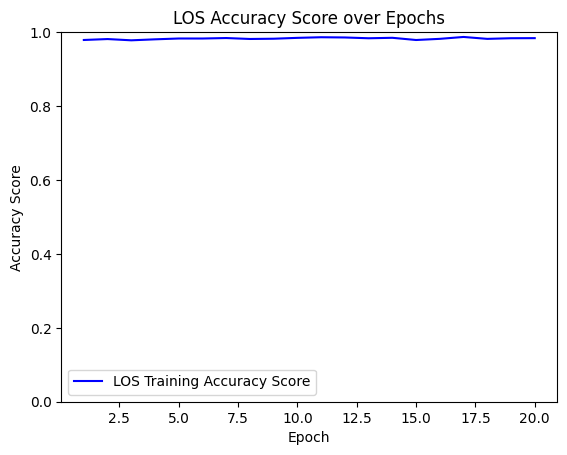

In [ ]:
epochs = 20  # Define the number of training epochs

# Create empty lists to store R2 scores
train_r2_scores = []


# Training loop over epochs for training data
for epoch in range(epochs):
    # Train the chain regressor
    chain_regressor.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = chain_regressor.predict(X_train)
    train_r2_score = r2_score(y_train, y_train_pred)
    train_r2_scores.append(train_r2_score)

    # Print training R2 score for training data
    print(f"LOS - Epoch {epoch + 1} - Training Accuracy Score: {train_r2_score}")


# Plot R2 scores over epochs for training data
plt.plot(range(1, epochs+1), train_r2_scores, label='LOS Training Accuracy Score', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.title('LOS Accuracy Score over Epochs')
plt.ylim(0.0, 1.0)  # Set the y-axis limits
plt.legend()
plt.show()



In [ ]:
 #STEP 5:
# User input for prediction
num_rows = int(input("Enter the number of rows:"))

# Create an empty1. DataFrame to store input values
input_table = pd.DataFrame(columns=['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPationalHazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough'])

# Loop over the number of rows
for i in range(num_rows):
    row_number = i + 1
    print(f"\n\nEnter the values for row {row_number}:")
    age = float(input("Age: "))
    gender = float(input("Gender: "))
    air_pollution = float(input("Air Pollution: "))
    alcohol_use = float(input("Alcohol use: "))
    dust_allergy = float(input("Dust Allergy: "))
    occupational_hazards = float(input("Occupational Hazards: "))
    genetic_risk = float(input("Genetic Risk: "))
    chronic_lung_disease = float(input("Chronic Lung Disease: "))
    balanced_diet = float(input("Balanced Diet: "))
    obesity = float(input("Obesity: "))
    smoking = float(input("Smoking: "))
    passive_smoker = float(input("Passive Smoker: "))
    chest_pain = float(input("Chest Pain: "))
    coughing_of_blood = float(input("Coughing of Blood: "))
    fatigue = float(input("Fatigue: "))
    weight_loss = float(input("Weight Loss: "))
    shortness_of_breath = float(input("Shortness of Breath: "))
    wheezing = float(input("Wheezing: "))
    swallowing_difficulty = float(input("Swallowing Difficulty: "))
    clubbing_of_finger_nails = float(input("Clubbing of Finger Nails: "))
    frequent_cold = float(input("Frequent Cold: "))
    dry_cough = float(input("Dry Cough: "))


    # Create a new row with input values
    input_row = pd.DataFrame({'Age': [age], 'Gender': [gender], 'Air Pollution': [air_pollution],
                          'Alcohol use': [alcohol_use], 'Dust Allergy': [dust_allergy],
                          'OccuPationalHazards': [occupational_hazards], 'Genetic Risk': [genetic_risk],
                          'chronic Lung Disease': [chronic_lung_disease], 'Balanced Diet': [balanced_diet],
                          'Obesity': [obesity], 'Smoking': [smoking], 'Passive Smoker': [passive_smoker],
                          'Chest Pain': [chest_pain], 'Coughing of Blood': [coughing_of_blood],
                          'Fatigue': [fatigue], 'Weight Loss': [weight_loss], 'Shortness of Breath': [shortness_of_breath],
                          'Wheezing': [wheezing], 'Swallowing Difficulty': [swallowing_difficulty],
                          'Clubbing of Finger Nails': [clubbing_of_finger_nails], 'Frequent Cold': [frequent_cold],
                          'Dry Cough': [dry_cough]})


    # Append the new row to the input table
    input_table = pd.concat([input_table, input_row], ignore_index=True)

# Apply styling to the input table
styled_input_table = input_table.style \
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#ffc107'),
                                     ('border', '2px solid black'),
                                     ('padding', '8px'),
                                     ('text-align', 'center')]}
    ]) \
    .set_properties(subset=['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPationalHazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough'], **{'text-align': 'center'}) \
    .set_properties(subset=['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPationalHazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough'], **{'width': '200px'})

# Render the styled input table with expanded width
styled_input_table_html = styled_input_table.to_html(escape=False)

# Display the styled input table
from IPython.display import display, HTML
display(HTML(styled_input_table_html))

Enter the number of rows:1


Enter the values for row 1:
Age: 15
Gender: 1
Air Pollution: 2
Alcohol use: 4
Dust Allergy: 5
Occupational Hazards: 4
Genetic Risk: 3
Chronic Lung Disease: 2
Balanced Diet: 2
Obesity: 4
Smoking: 3
Passive Smoker: 2
Chest Pain: 2
Coughing of Blood: 4
Fatigue: 3
Weight Loss: 4
Shortness of Breath: 2
Wheezing: 2
Swallowing Difficulty: 3
Clubbing of Finger Nails: 1
Frequent Cold: 2
Dry Cough: 3


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPationalHazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough
0,15.000000,1.000000,2.000000,4.000000,5.000000,4.000000,3.000000,2.000000,2.000000,4.000000,3.000000,2.000000,2.000000,4.000000,3.000000,4.000000,2.000000,2.000000,3.000000,1.000000,2.000000,3.000000


In [ ]:
#STEP 6:
print('\n\nResult of the Predicted Value for Snoring\n')
# Predict the combination of (SF, CR, BW) based on user input
predicted_combination = chain_regressor.predict(input_table)

# Convert the predicted values to integers
predicted_combination = predicted_combination.astype(int)

# Create a table to display predicted combination
output_table = input_table.copy()

# Add predicted combination columns
output_table['Predicted Snoring'] = predicted_combination[:, 0]

# Apply styling to the output table
styled_output_table = output_table[
    ['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPationalHazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Predicted Snoring']
].style \
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#007bff'),
                                     ('border', '2px solid black'),
                                     ('padding', '8px'),
                                     ('text-align', 'center'),
                                     ('color', 'white')]},
        {'selector': 'th:first-child', 'props': [('color', 'white')]},
        {'selector': 'td:nth-child(2)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(3)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(4)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(5)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(6)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(7)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(8)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(9)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(10)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(11)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(12)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(13)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(14)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(15)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(16)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(17)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(18)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(19)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(20)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(21)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(22)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(23)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(24)', 'props': [('color', '#dc3545')]},

    ]) \
    .set_properties(subset=['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPationalHazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Predicted Snoring'], **{'text-align': 'center'})

# Render the styled output table
styled_output_table_html = styled_output_table.to_html(escape=False)

# Display the styled output table
display(HTML(styled_output_table_html))




Result of the Predicted Value for Snoring



,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPationalHazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Predicted Snoring
0,15.000000,1.000000,2.000000,4.000000,5.000000,4.000000,3.000000,2.000000,2.000000,4.000000,3.000000,2.000000,2.000000,4.000000,3.000000,4.000000,2.000000,2.000000,3.000000,1.000000,2.000000,3.000000,4


In [ ]:
#STEP 7:
print('\n\nFull Table of the Predicted Snoring Value Including the Lung Cancer Level\n')

predicted_combination = chain_regressor.predict(input_table)

# Create a table to display predicted combination
output_table = input_table.copy()

# Add predicted combination columns
output_table['Predicted Snoring'] = predicted_combination[:, 0]

# Apply styling to the output table
styled_output_table = output_table[
    ['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPationalHazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Predicted Snoring']
].style \
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#007bff'),
                                     ('border', '2px solid black'),
                                     ('padding', '8px'),
                                     ('text-align', 'center'),
                                     ('color', 'white')]},
        {'selector': 'th:first-child', 'props': [('color', 'white')]},
        {'selector': 'td:nth-child(2)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(3)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(4)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(5)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(6)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(7)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(8)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(9)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(10)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(11)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(12)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(13)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(14)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(15)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(16)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(17)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(18)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(19)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(20)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(21)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(22)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(23)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(24)', 'props': [('color', '#dc3545')]},

    ]) \
    .set_properties(subset=['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPationalHazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Predicted Snoring'], **{'text-align': 'center'})
    # Define the conditions for efficiency calculation
conditions = [
    (output_table['Predicted Snoring'] == 4),
    (output_table['Predicted Snoring'] == 2),
    (output_table['Predicted Snoring'] == 5)
]

outputs = ['Low', 'Medium', 'High']

# Add 'Efficiency' column based on conditions
output_table['Predicted Lung Cancer Level'] = np.select(conditions, outputs, default='Low')

# Convert predicted parameters to integers
output_table['Predicted Snoring'] = output_table['Predicted Snoring'].astype(int)

# Apply styling to the output table
styled_output_table = output_table[
    ['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPationalHazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Predicted Snoring', 'Predicted Lung Cancer Level']
].style \
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#007bff'),
                                     ('border', '2px solid black'),
                                     ('padding', '8px'),
                                     ('text-align', 'center'),
                                     ('color', 'white')]},
        {'selector': 'th:first-child', 'props': [('color', 'white')]},
        {'selector': 'td:nth-child(2)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(3)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(4)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(5)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(6)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(7)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(8)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(9)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(10)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(11)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(12)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(13)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(14)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(15)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(16)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(17)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(18)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(19)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(20)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(21)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(22)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(23)', 'props': [('color', 'black')]},
        {'selector': 'td:nth-child(24)', 'props': [('color', '#dc3545')]},
        {'selector': 'td:nth-child(25)', 'props': [('color', 'black')]},

    ]) \
    .set_properties(subset=['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPationalHazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Predicted Snoring', 'Predicted Lung Cancer Level'], **{'text-align': 'center'})






# Render the styled output table
styled_output_table_html = styled_output_table.to_html(escape=False)

# Display the styled output table
display(HTML(styled_output_table_html))



Full Table of the Predicted Snoring Value Including the Lung Cancer Level



,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPationalHazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Predicted Snoring,Predicted Lung Cancer Level
0,15.000000,1.000000,2.000000,4.000000,5.000000,4.000000,3.000000,2.000000,2.000000,4.000000,3.000000,2.000000,2.000000,4.000000,3.000000,4.000000,2.000000,2.000000,3.000000,1.000000,2.000000,3.000000,4,Low
